# Introducción a Machine Learning

## Aprendizaje Supervisado - Clasificación

En este notebook comenzamos a trabajar en los problemas de **Clasificación**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Machine Learning consiste en aprender etiquetas discretas *y* a partir de un conjunto de features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

Vamos a comenzar introduciendo un dataset sintético de dos features y dos clases. Y trataremos de aprender a clasificarlo usando nuestro primer modelo, un Árbol de Decisión. Haremos esto utilizando la librería Scikit-Learn. Como la mayoría de las librerías que usamos hasta ahora, tiene una documentación excelente, muy detallada y con ejemplos de uso. Muchas veces, para aprender a usar alguna herramienta de Scikit-Learn basta con copiar estos ejemplos y empezar a *jugar* con ellos. También contiene introducciones teóricas a muchos de los temas que son claras y concisas. Por último, ten en cuenta lo que vimos de funciones y programación orientada a objetos, hará mucho más fácil la comprensión de esta documentación.

### 1. Ejemplo demostrativo

Ahora sí, empecemos con un ejemplo *de juguete*.

#### 1.1 Generando nuestro dataset

Vamos a generar automáticamente un grupo de 1000 instancias con features llamados *x1* y *x2* - agrupados en una única variable `X`- a los cuales les vamos a asignar una etiqueta `y`, la cual puede valer 0 y 1. Esto lo haremos utilizando una función que ya viene incorporada en Scikit-Learn, `make_blobs`. Puede consultar la información sobre los datasets que ya vienen incorporados en Scikit-Learn [aquí](https://scikit-learn.org/stable/datasets/index.html#generated-datasets).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético.

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000, 
    centers=2,
    random_state=0, 
    cluster_std=1.3)

In [3]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed 

Ahora vamos a graficar las diferentes instancias que generamos como puntos en el plano (x1,x2) y les asignamos un color distinto segun cual sea su etiqueta `y`:

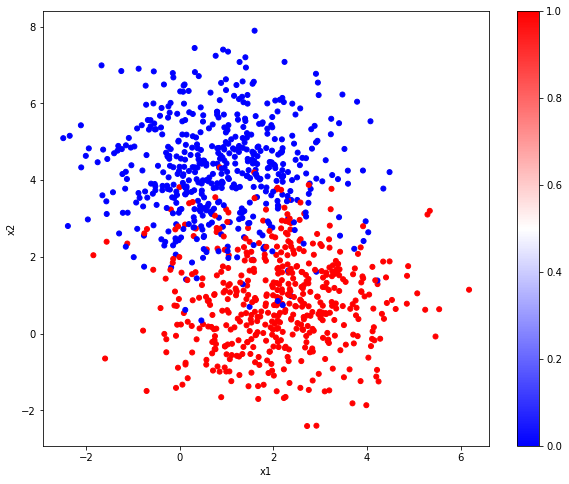

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 1.2 Modelo: Árbol de decisión

El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión. Veremos en detalle árboles de decisión durante el siguiente encuentro. Por ahora basta que consideres que es un objeto que, dadas varias instancias con un determinados grupo de features **X** y unas determinadas etiquetas objetivo **y**, el árbol de desición aprende **automáticamente** reglas (de mayor a menor importancia) sobre cada feature de manera de poder decidir qué etiqueta le corresponde a cada instancia.

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase `DecisionTreeClassifier`, la cual importamos desde la librería Scikit-Learn. Te recomendamos **fuertemente** que te vayas familiarizando con su documentación, no importa si por ahora no entiendes todo. Durante el próximo encuentro veremos más en detalle el funcionamiento de este modelo.

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

Hasta ahora, lo único que hicimos fue crear el objeto, nada más.

Una vez que nuestro modelo fue creado, precisamos entrenarlo sobre nuestros datos. Esto lo logramos con el método `fit(...)` que poseen **todas** las clases correspondientes a modelos de Scikit-Learn.

In [8]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

**¿Qué ocurrió?**

El modelo ya está entrenado. Esto significa que contamos con una herramienta que, dadas ciertas características de una instancia - pares (*x1* y *x2*) - nos devuelve qué etiqueta *y* el modelo cree que le corresponde. Esto lo podemos hacer utilizando el método `predict(...)`, que también poseen **todas** las clases correspondientes a modelos de Scikit-Learn. Veamos algunos ejemplos:

1. Inventando instancias

In [10]:
### Inventamos una instancia

instancia = np.array([4,0]) # el primer valor corresponde a x1 y el segundo x2
instancia = instancia.reshape(1,-1) # No te preocupes por ahora por el reshape. Es un requisito que quedará más claro después
print(instancia)
y_pred = tree.predict(instancia) # Hacemos la predicciṕn
print(y_pred) # imprimimos en pantalla la predicción

[[4 0]]
[1]


¿Estás de acuerdo con la etiqueta asignada? Mirá en el gráfico del set de entrenamiento si estás de acuerdo con la etiqueta que nos devolvió.

2. Tomando instancias del set de entrenamiento.

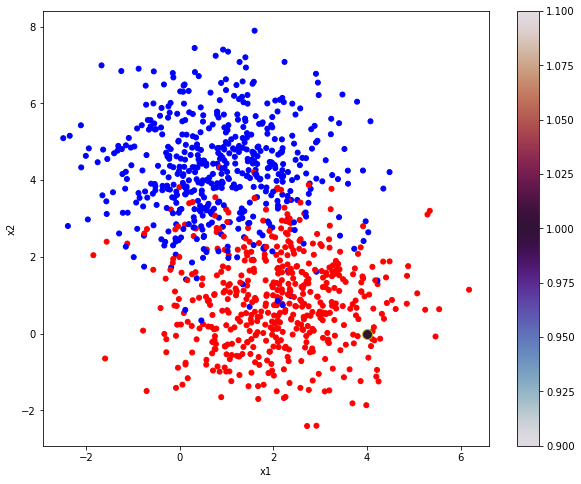

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.scatter(instancia[:, 0], instancia[:, 1], c=y_pred, s=100,edgecolors='y', cmap='twilight')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [41]:
### Tomamos las instancias al azar
#np.random.seed(3) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
n = 3
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)

[[ 0.69919917 -0.21653799]
 [ 0.36481664 -0.14734187]
 [-1.14298777  4.90540426]]


In [42]:
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred.reshape(1,-1))

[[1 1 0]]


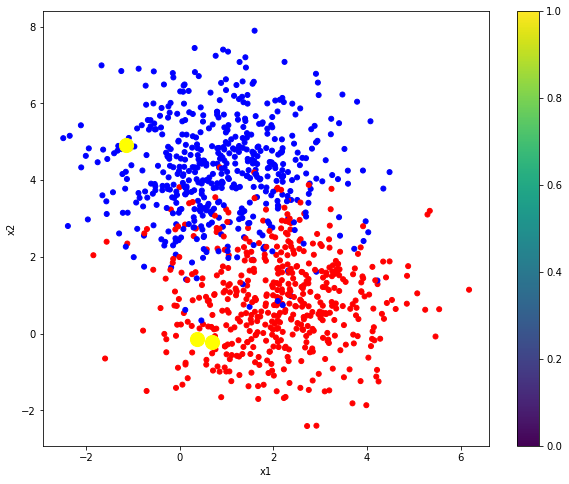

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.scatter(instancias[:, 0], instancias[:, 1], c=y_pred.reshape(1,-1), s=200, cmap='twilight')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [44]:
### Comparamos la etiqueta real con la predicha:

for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 256. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 789. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 659. Etiqueta real: 0. Etiqueta predicha: 0


Ejecuta varias veces las tres celdas superiores. ¿El modelo acierta siempre? Selecciona alguna instancia cuya etiqueta no funcione y observa sus valores. ¿Por qué crees que falla? Por ejemplo, la 874:

[[1.24204338 2.18744154]]
[[0]]


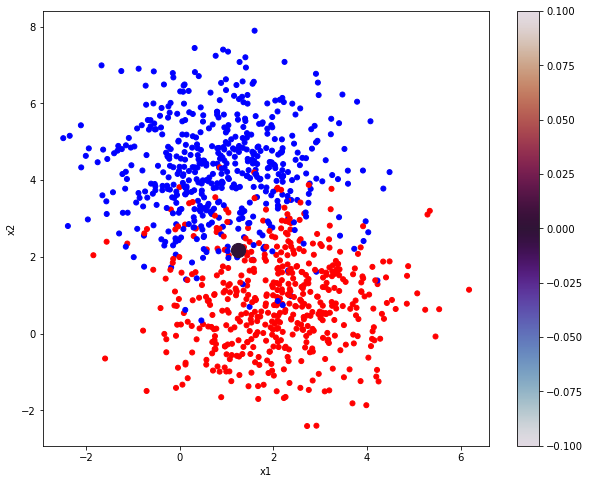

Instancia 874. Etiqueta real: 1. Etiqueta predicha: 0


In [47]:
idxs = [874]
instancias = X[idxs,:]
print(instancias)

y_pred = tree.predict(instancias)
print(y_pred.reshape(1,-1))

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.scatter(instancias[:, 0], instancias[:, 1], c=y_pred.reshape(1,-1), s=200, cmap='twilight')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Comparamos la etiqueta real con la predicha:

for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

In [48]:
k = 874
print(X[k,:])

[1.24204338 2.18744154]


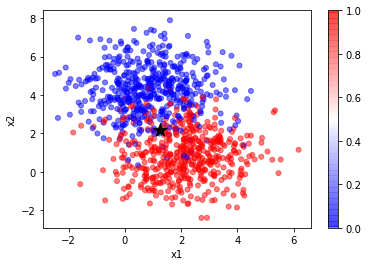

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr', alpha = 0.5)
plt.colorbar()
plt.scatter(X[k, 0], X[k, 1], c = 'k', s=200, cmap='bwr', marker = '*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Volvamos sobre un aspecto del clasificador: dadas características *x1* y *x2* de una instancia, nos dice qué etiqueta *y* (0: azul, 1: rojo) le corresponde. Podemos pensar que el clasificador *pinta* el plano *x1*,*x2* de acuerdo al color que cree que corresponde. Si hay regiones azules y regiones rojas, debe existir una frontera donde el color cambie. Tratemos de visualizarla.

La función que definimos en la siguiente celda nos permite explorar cómo es el dominio de decisión de nuestro arbol una vez que lo entrenamos.

In [52]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    plt.figure(figsize=(10,10))
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

C:\Anaconda3\envs\acamica\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


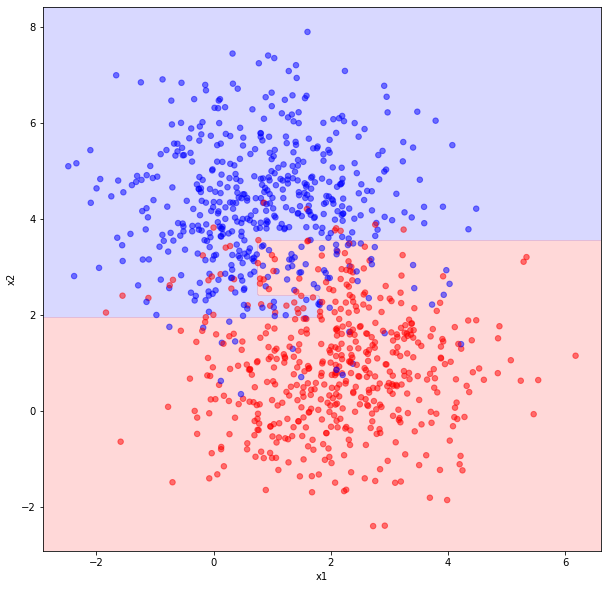

In [53]:
visualize_classifier(tree, X, y)

En este gráfico aquellos puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. Esto quiere decir que que si usamos el modelo para calificar su etiqueta *y* a partir de sus coordenadas *x1* y *x2*, éste nos daría la misma etiqueta original del punto. En cambio, aquellos puntos que queda sobre un fondo de otro color son puntos para los cuales el modelo nos estaría dando una etiqueta distinta a la etiqueta original de esa instancia.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo? Para responder esto usaremos nuevamente el método `predict` sobre todo el dataset `X`. Luego con la función `accuracy_score` podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción `y_pred` contra la clase original `y`. Recomendamos mirar la documentación de esta función, por ahora simplemente diremos que es una de las tantas **métricas** que utilizamos para evaluar nuestros modelos, y lo que hace es devolvernos un porcentaje de aciertos.

In [54]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.905

Esto quiere decir que el clasificador asigna la etiqueta correcta en el 90.5% de los casos.

Otra forma de ver los resultados de nuestro clasificador es la **matriz de confusión**. La matriz de confusión es una tabla de doble entrada, donde un eje corresponde a la etiqueta real y otro a la etiqueta predicha. En la diagonal encontramos los aciertos, mientras que por fuera de la diagonal aquellas instancias mal clasificadas. Nuevamente, recomendamos ver la documentación.

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))


[[439  61]
 [ 34 466]]


Una forma más interesante de ver esta información es con la función `plot_confusion_matrix`:

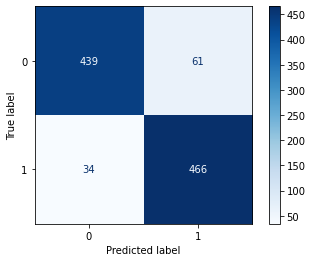

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')


O podemos obtener una versión **normalizada:**

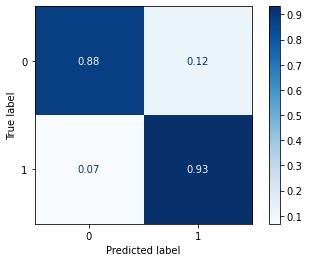

In [57]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f', normalize= 'true')

**Challenge - Para pensar y probar**:
1. ¿Qué ocurre si modificas el valor de `cluster_std` en la función `make_blobs`?¿En qué casos será más fácil - o difícil - la tarea de clasificación?
2. ¿Qué ocurre si modificas el valor de `centers` en la función `make_blobs`?¿En qué cambia la formulación del problema de clasificación?
3. Hay algunas características de esta formulación que tal vez te llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una **frontera** entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):
    1. Elegir un problema de Clasificación Binario (al estilo Spam/No-Spam, Titanic Sobrevivió/No-Sobrevivió, etc.). Inventar - a mano - dos atributos, algunas instancias, y graficar. Luego, dibujar una frontera de decisión (siempre a mano, no tienen que programar). Un ejemplo podría ser: para clasificar vinos blancos y vinos tintos, un atributo podría ser el color y el otro podría ser el dulzor.
    2. ¿Qué ocurre si en lugar de dos atributos tenemos tres?¿Qué forma tendrá la frontera? Y si en vez de tres atributos tenemos cuatro?¿Se podrá visualizar?
    3. **Extra:** googlea qué es la maldición de la dimensión/dimensionalidad (curse of dimensionality).
    
### 2. Iris Dataset

Como no podía ser de otra manera, vas a entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Te dejamos algunas consignas de guía.

1. Cargar los datos. Usar la función `load_iris` de Scikit-Learn. ¿Qué tipo de dato devuelve? Pasar a un dataframe de Pandas (¡Googlear!). Prestar atención a `target` y a `target_names`.

In [ ]:
#  maldición de la dimensión/dimensionalidad (curse of dimensionality)